# 作业要求：
本次作业分两部分：
1. 客观题；
2. 代码填空题；


两部分作业共计100分，其中：

客观题：10道题，5分/个，共50分；
代码填空题：运行得到符合要求的曲线则计50分，否则该部分得0分。


## 第一部分：客观题
链接：[https://ks.wjx.top/jq/43297274.aspx](https://ks.wjx.top/jq/43297274.aspx)

要求：
1. 大家必须于**7月30日（周二）22:00**前完成作业并提交，晚于该时间将无法作答，该部分计0分。
## 第二部分：代码填空题
要求：
1. 补全下面代码中的填空部分；
2. 补全填空后，要求代码能够运行，不报错，且有运行曲线输出，且输出的曲线和代码讲解中给出的曲线相符，即曲线趋势相似；
3. **切记不要**清空输出，否则老师无法看到你的输出空间的运行结果，按没有完成作业来论，该部分作业计0分；
4. 大家于**7月30日（周二）22:00**前完成作业（即运行得到符合要求的曲线），助教将从该时间起判作业，如果看不到大家的曲线，该部分作业计0分。


In [22]:
#因为本次实验除了代码还有许多知识点讲解。
#知识点是以markdown形式展现的，含有许多图片。
#运行完这条命令，并刷新一下本页面，本实验中的图片就可以展现出来了。
#这条命令只需要运行一遍就可以了。
!DATA_PATH=data/data9911/ && NEW_NAME=$(find -name *[0-9].ipynb) && NEW_NAME=${NEW_NAME%.*} && NEW_NAME=${NEW_NAME#./} && unzip -o ${DATA_PATH}data_images.zip  && cp -rf data_images/. .

Archive:  data/data9911/data_images.zip
  inflating: data_images/datasets/data.txt  
  inflating: data_images/images/.png  
  inflating: data_images/images/FC.png  
  inflating: data_images/images/ML_process.png  
  inflating: data_images/images/gradient_descent.png  
  inflating: data_images/images/plt.png  
  inflating: data_images/images/result.png  


# PaddlePaddle实现线性回归

欢迎大家来到这次实验！在本次实验中我们将使用PaddlePaddle深度学习框架来搭建一个简单的线性回归模型，并利用这一模型来解决一个大家都关心的实际问题————预测你的储蓄（也就是money）（在某地区）可以购买多大面积的房子。并且在学习本次实验课的过程中，我还会带领大家学习到机器学习的若干重要概念，掌握一个机器学习预测案例的基本流程。当然了，有机器学习基础的同学就是回忆喽！

**本节实验课你将学会**

- 机器学习的基本概念：假设函数、损失函数、优化算法
- 数据怎么进行归一化处理
- paddlepaddle深度学习框架的一些基本知识
- 如何用paddlepaddle深度学习框架搭建全连接神经网络，实现线性回归（你将会发现用paddlepaddle搭建神经网络是多么的简单）

大家期待不期待？

在实验开始之前，我们先对机器学习的相关概念进行学习、复习和回顾！

**机器学习回顾**

机器学习是怎么一个工作过程呢？  
是这样的：  
我们首先输入训练数据集，利用特定的机器学习方法建立估计函数，并进行训练。训练后得到一个模型。然后向这一模型输入测试数据集，函数有能力对没有见过的数据进行正确估计，这就是机器学习的过程。
<img src="images/ML_process.png" style="width:300px;height:180px;">

**线性回归的基本概念**  
再来回顾一下线性回归的一些知识：  
线性回归是机器学习中最简单也是最重要的模型之一，其模型建立同样遵循上图流程：获取数据、数据预处理、训练模型、应用模型。

回归模型可以理解为：存在一个点集，用一条曲线去拟合它分布的过程。如果拟合曲线是一条直线，则称为线性回归。如果是一条二次曲线，则被称为二次回归。线性回归是回归模型中最简单的一种。

在线性回归中有几个基本的概念需要掌握：
- 假设函数（Hypothesis Function）
- 损失函数（Loss Function）
- 优化算法（Optimization Algorithm）

**假设函数**：

假设函数是指，用数学的方法描述自变量和因变量之间的关系，它们之间可以是一个线性函数或非线性函数。
在本次线性回顾模型中，我们的假设函数为 $\hat{Y}= aX_1+b$ ，其中，$\hat{Y}$表示模型的预测结果（预测房价），用来和真实的Y区分。模型要学习的参数即：a,b。

**损失函数**：

损失函数是指，用数学的方法衡量假设函数预测结果与真实值之间的误差。这个差距越小预测越准确，而算法的任务就是使这个差距越来越小。

建立模型后，我们需要给模型一个优化目标，使得学到的参数能够让预测值$\hat{Y}$尽可能地接近真实值Y。输入任意一个数据样本的目标值$y_i$和模型给出的预测值$\hat{Y_i}$，损失函数输出一个非负的实值。这个实值通常用来反映模型误差的大小。

对于线性模型来讲，最常用的损失函数就是均方误差（Mean Squared Error， MSE）。
$$MSE=\frac{1}{n}\sum_{i=1}^{n}(\hat{Y_i}-Y_i)^2$$
即对于一个大小为n的测试集，MSE是n个数据预测结果误差平方的均值。

**优化算法**：

在模型训练中优化算法也是至关重要的，它决定了一个模型的精度和运算速度。本章的线性回归实例中主要使用了梯度下降法进行优化。

**梯度下降**是深度学习中非常重要的概念，值得庆幸的是它也十分容易理解。损失函数$J(w,b)$可以理解为变量$w$和$b$的函数。观察下图，垂直轴表示损失函数的值，两个水平轴分别表示变量$w$和$b$。实际上，可能是更高维的向量，但是为了方便说明，在这里假设$w$和$b$都是一个实数。算法的最终目标是找到损失函数的最小值。而这个寻找过程就是不断地微调变量$w$和$b$的值，一步一步地试出这个最小值。而试的方法就是沿着梯度方向逐步移动。本例中让图中的圆点表示损失函数的某个值，那么梯度下降就是让圆点沿着曲面下降，直到取到最小值或逼近最小值。

因为是凸函数，所以无论初始化在曲面上的哪一点，最终都会收敛到同一点或者相近的点。

<img src="images/gradient_descent.png" style="width:380px;height:180px;">


现在，让我们正式进入实验吧！

# 1 - 引用库

首先载入需要用到的库，它们分别是：

- numpy：NumPy是Python语言的一个扩展程序库。支持高端大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。NumPy的核心功能是"ndarray"(即n-dimensional array，多维数组)数据结构。
- matplotlib.pyplot：用于生成图，在验证模型准确率和展示成本变化趋势时会使用到
- paddle.fluid：引入PaddlePaddle深度学习框架的fluid版本库；
- pandas:Pandas是python第三方库，提供高性能易用数据类型和分析工具，Pandas基于Numpy实现，常与Numpy和Matplotlib一同使用

In [23]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import paddle
import paddle.fluid as fluid

import math
import sys

#%matplotlib inline

# 2 - 数据预处理

本次数据集使用的是2016年12月份某市某地区的房价分布。为了简化模型，假设影响房价的因素只有房屋面积，因此数据集只有两列，以TXT的形式储存。下面我们打开数据集来看一看。  

当真实数据被收集到后，它们往往不能直接使用。  
例如本次数据集使用了某地区的房价分布，为了简化模型数据只有两维，并没有标出来每一列代表什么，其实分别是房屋面积与房屋价格。可以看到房价与房屋面积之间存在一种关系，这种关系究竟是什么，就是本次预测想要得到的结论。可以首先以表格的形式输出数据的前五行看一下

In [24]:
colnames = ['房屋面积']+['房价']
print_data = pd.read_csv('./datasets/data.txt',names = colnames)
print_data.head()

,房屋面积,房价
0,98.87,599.0
1,68.74,450.0
2,89.24,440.0
3,129.19,780.0
4,61.64,450.0


一般拿到一组数据后，第一个要处理的是数据类型不同的问题。如果各维属性中有离散值和连续值，就必须对离散值进行处理。

离散值虽然也常使用类似0、1、2这样的数字表示，但是其含义与连续值是不同的，因为这里的差值没有实际意义。例如，我们用0、1、2来分别表示红色、绿色和蓝色的话，我们并不能因此说“蓝色和红色”比“绿色和红色”的距离更远。通常对有d个可能取值的离散属性，我们会将它们转为d个取值为0或1的二值属性或者将每个可能取值映射为一个多维向量。

不过就这里而言，数据中没有离散值，就不用考虑这个问题了。

** 归一化 **

观察一下数据的分布特征，一般而言，如果样本有多个属性，那么各维属性的取值范围差异会很大，这就要用到一个常见的操作-归一化（normalization）了。归一化的目标是把各维属性的取值范围放缩到差不多的区间，例如[-0.5, 0.5]。这里我们使用一种很常见的操作方法：减掉均值，然后除以原取值范围。

虽然本次房价预测模型中，输入属性只有房屋面积，不存在取值范围差异问题，但由于归一化的各种优点，我们仍选择对其进行归一化操作。

**练习：**

完成下列代码，实现房屋面积的归一化。

输出归一化后的房价最大值，判断操作是否正确。

In [25]:
# coding = utf-8 #
global x_raw,train_data,test_data
data = np.loadtxt('./datasets/data.txt',delimiter = ',')
x_raw = data.T[0].copy() 

#axis=0,表示按列计算
#data.shape[0]表示data中一共有多少列
maximums, minimums, avgs = data.max(axis=0), data.min(axis=0), data.sum(axis=0)/data.shape[0]
print("the raw area :",data[:,0].max(axis = 0))
print(avgs[0])
#归一化，data[:,i]表示第i列的元素

### START CODE HERE ### (≈ 3 lines of code)
data[:,0] = (data[:,0] - avgs[0])/(maximums[0]-minimums[0])



### END CODE HERE ###
print(data)
print('normalization:',data[:,0].max(axis = 0))
    

the raw area : 199.96
94.64454022988511
[[ 2.64305984e-02  5.99000000e+02]
 [-1.62035030e-01  4.50000000e+02]
 [-3.38058437e-02  4.40000000e+02]
 ...
 [-3.53070634e-02  7.35000000e+02]
 [-2.19644337e-01  3.60000000e+02]
 [ 1.47335946e-02  6.00000000e+02]]
normalization: 0.6587568635148239


期望输出：normalization: 0.6587568635148239

基本上所有的数据在拿到后都必须进行归一化，至少有以下3条原因：

1.过大或过小的数值范围会导致计算时的浮点上溢或下溢。

2.不同的数值范围会导致不同属性对模型的重要性不同（至少在训练的初始阶段如此），而这个隐含的假设常常是不合理的。这会对优化的过程造成困难，使训练时间大大加长。

3.很多的机器学习技巧/模型（例如L1，L2正则项，向量空间模型-Vector Space Model）都基于这样的假设：所有的属性取值都差不多是以0为均值且取值范围相近的。

** 数据集分割 **

将原始数据处理为可用数据后，为了评估模型的好坏，我们将数据分成两份：训练集和测试集。
- 训练集数据用于调整模型的参数，即进行模型的训练，模型在这份数据集上的误差被称为训练误差；
- 测试集数据被用来测试，模型在这份数据集上的误差被称为测试误差。

我们训练模型的目的是为了通过从训练数据中找到规律来预测未知的新数据，所以测试误差是更能反映模型表现的指标。分割数据的比例要考虑到两个因素：更多的训练数据会降低参数估计的方差，从而得到更可信的模型；而更多的测试数据会降低测试误差的方差，从而得到更可信的测试误差。我们这个例子中设置的分割比例为8:2。

**练习：**

补全下列代码，完成训练集与测试集的分割。输出数据大小，验证分割是否正确。

- 提示：

    A[:x] 表示取A中的前x个元素
    
    A[x:]表示从第x+1个元素开始取到最后一个元素
    
期望输出：  

870  
696


In [26]:
ratio = 0.8
offset = int(data.shape[0]*ratio)

### START CODE HERE ### (≈ 2 lines of code)
train_data = data[:offset] 
test_data  = data[offset:]
### END CODE HERE ###

print(len(data))
print(len(train_data))

870
696


# 3 - 定义reader

构造read_data()函数，来读取训练数据集train_set或者测试数据集test_set。它的具体实现是在read_data()函数内部构造一个reader()，使用yield关键字来让reader()成为一个Generator（生成器），注意，yield关键字的作用和使用方法类似return关键字，不同之处在于yield关键字可以构造生成器（Generator）。虽然我们可以直接创建一个包含所有数据的列表，但是由于内存限制，我们不可能创建一个无限大的或者巨大的列表，并且很多时候在创建了一个百万数量级别的列表之后，我们却只需要用到开头的几个或几十个数据，这样造成了极大的浪费，而生成器的工作方式是在每次循环时计算下一个值，不断推算出后续的元素，不会创建完整的数据集列表，从而节约了内存使用。

In [27]:
def read_data(data_set):
    """
    一个reader
    Args：
        data_set -- 要获取的数据集
    Return：
        reader -- 用于获取训练集及其标签的生成器generator
    """
    def reader():
        """
        一个reader
        Args：
        Return：
            data[:-1],data[-1:] --使用yield返回生成器
                data[:-1]表示前n-1个元素，也就是训练数据，
                data[-1:]表示最后一个元素，也就是对应的标签
        """
        for data in data_set:
            yield data[:-1],data[-1:]
    return reader

In [28]:
#测试reader

test_array = ([10,100],[20,200])
print("test_array for read_data:")
for value in read_data(test_array)():
    print(value)

test_array for read_data:
([10], [100])
([20], [200])


接下来我们定义了用于训练的数据提供器。提供器每次读入一个大小为BATCH_SIZE的数据批次。如果用户希望加一些随机性，它可以同时定义一个批次大小和一个缓存大小。这样的话，每次数据提供器会从缓存中随机读取批次大小那么多的数据。我们都可以通过batch_size进行设置，这个大小一般是2的N次方。

关于参数的解释如下：

- paddle.reader.shuffle(read_data(train_data),  buf_size=500)表示从read_data(train_data)中读取了buf_size=500大小的数据并打乱顺序
- paddle.batch(reader(), batch_size=BATCH_SIZE)表示从打乱的数据中再取出BATCH_SIZE=20大小的数据进行一次迭代训练

如果buf_size设置的数值大于数据集本身，就直接把整个数据集打乱顺序；如果buf_size设置的数值小于数据集本身，就按照buf_size的大小打乱顺序。

In [41]:
BATCH_SIZE = 32

# 设置训练reader
train_reader = paddle.batch(
    paddle.reader.shuffle(
        read_data(train_data), 
        buf_size=500),
    batch_size=BATCH_SIZE)

#设置测试 reader
test_reader = paddle.batch(
    paddle.reader.shuffle(
        read_data(test_data), 
        buf_size=500),
    batch_size=BATCH_SIZE)

# 4 - 训练过程


完成了数据的预处理工作并构造了read_data()来读取数据，接下来将进入模型的训练过程，使用PaddlePaddle来定义构造可训练的线性回归模型，关键步骤如下：

- 配置网络结构和设置参数
    - 配置网络结构
    - 定义损失函数cost
    - 定义执行器(参数随机初始化) 
    - 定义优化器optimizer

- 模型训练

- 预测

- 绘制拟合图像



**定义运算场所：**

首先进行最基本的运算场所定义，在 fluid 中使用 place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace() 来进行初始化：

- place 表示fluid program的执行设备，常见的有 fluid.CUDAPlace(0) 和 fluid.CPUPlace()
- use_cuda = False 表示不使用 GPU 进行加速训练

In [30]:
#使用CPU或者GPU训练
use_cuda = True
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace() 

**配置网络结构和设置参数：**

**配置网络结构：**


线性回归的模型其实就是一个采用线性激活函数（linear activation）的全连接层（fully-connected layer，fc_layer），因此在Peddlepeddle中利用全连接层模型构造线性回归，这样一个全连接层就可以看做是一个简单的神经网络，只包含输入层和输出层即可。本次的模型由于只有一个影响参数，因此输入只含一个$X_0$。

<img src="images/FC.png" style="width:380px;height:180px;">

接下来就让我们利用PaddlePaddle提供的接口，搭建我们自己的网络吧！

**输入层**  
我们可以用 x = fluid.layers.data(name='x', shape=[1], dtype='float32')来表示数据的一个输入层，其中name属性的名称为"x"，数据的shape为一维向量，这是因为本次所用的房价数据集的每条数据只有1个属性，所以shape=1。



**输出层**  
用y_predict = fluid.layers.fc(input=x, size=1, act=None)来表示输出层：其中paddle.layer.fc表示全连接层，input=x表示该层出入数据为x，size=1表示该层有一个神经元，在Fluid版本中使用的激活函数不再是调用一个函数了，而是传入一个字符串就可以，比如：act='relu'就表示使用relu激活函数。act=None表示激活函数为线性激活函数。


**标签层**

用y = fluid.layers.data(name='y', shape=[1], dtype='float32')来表示标签数据，名称为y，有时我们名称不用y而用label。数据类型为一维向量。

**练习** 根据提示，完成下面代码

In [31]:
# 输入层，fluid.layers.data表示数据层,name=’x’：名称为x,输出类型为tensor
# shape=[1]:数据为1维向量
# dtype='float32'：数据类型为float32
### START CODE HERE ### (≈ 1 lines of code)
x = fluid.layers.data(name='x', shape=[1], dtype='float32')

### END CODE HERE ###


# 标签数据，fluid.layers.data表示数据层,name=’y’：名称为y,输出类型为tensor
# shape=[1]:数据为1维向量
### START CODE HERE ### (≈ 1 lines of code)
y = fluid.layers.data(name='y', shape=[1], dtype='float32')

### END CODE HERE ###

# 输出层，fluid.layers.fc表示全连接层，input=x: 该层输入数据为x
# size=1：神经元个数，act=None：激活函数为线性函数
y_predict = fluid.layers.fc(input=x, size=1, act=None)

**定义损失函数:**

PaddlePaddle提供了很多的损失函数的接口，比如交叉熵损失函数(cross_entropy)。因为本项目是一个线性回归任务，所以我们使用的是均方差损失函数。可以调用fluid.layers.square_error_cost(input= ,laybel= )实现方差计算。因为fluid.layers.square_error_cost(input= ,laybel= )求的是一个Batch的损失值，所以我们还要通过调用fluid.layers.mean(loss)对方差求平均。

将输入定义为 **房价预测值**，label定义为 **标签数据**。进而计算损失值。

**练习:** 完成下面代码


In [32]:
# 定义损失函数为均方差损失函数,并且求平均损失，返回值名称为avg_loss
### START CODE HERE ### (≈ 2 lines of code)
avg_loss = fluid.layers.mean(fluid.layers.square_error_cost(input=y_predict, label=y))

### END CODE HERE ###

**定义执行器(参数随机初始化):**

首先定义执行器，fulid使用了一个C++类Executor用于运行一个程序，Executor类似一个解析器，Fluid将会使用这样一个解析器来训练和测试模型。


In [33]:
exe = fluid.Executor(place)

**配置训练程序:**

①全局主程序main program。该主程序用于训练模型。

②全局启动程序startup_program。

③测试程序test_program。用于模型测试。


In [34]:
main_program = fluid.default_main_program() # 获取默认/全局主函数
startup_program = fluid.default_startup_program() # 获取默认/全局启动程序

#克隆main_program得到test_program
#有些operator在训练和测试之间的操作是不同的，例如batch_norm，使用参数for_test来区分该程序是用来训练还是用来测试
#该api不会删除任何操作符,请在backward和optimization之前使用
test_program = main_program.clone(for_test=True)

**优化方法:**

损失函数定义确定后，需要定义参数优化方法。为了改善模型的训练速度以及效果，学术界先后提出了很多优化算法，包括： Momentum、RMSProp、Adam 等，已经被封装在fluid内部，读者可直接调用。本次可以用 fluid.optimizer.SGD(learning_rate= ) 使用随机梯度下降的方法优化，其中learning_rate表示学习率，大家可以自己尝试修改。



In [35]:
# 创建optimizer，更多优化算子可以参考 fluid.optimizer()
learning_rate = 0.01
sgd_optimizer = fluid.optimizer.SGD(learning_rate)
sgd_optimizer.minimize(avg_loss)
print("optimizer is ready")

optimizer is ready


**训练模型:**

上述内容进行了模型初始化、网络结构的配置并创建了训练函数、硬件位置、优化方法，接下来利用上述配置进行模型训练。


**创建训练过程:**

训练需要有一个训练程序和一些必要参数，并构建了一个获取训练过程中测试误差的函数。必要参数有executor,program,reader,feeder,fetch_list，executor表示之前创建的执行器，program表示执行器所执行的program，是之前创建的program，如果该项参数没有给定的话则默认使用defalut_main_program，reader表示读取到的数据，feeder表示前向输入的变量，fetch_list表示用户想得到的变量或者命名的结果。

In [36]:
# For training test cost
def train_test(executor, program, reader, feeder, fetch_list):
    accumulated = 1 * [0]
    count = 0
    for data_test in reader():
        outs = executor.run(
            program=program, feed=feeder.feed(data_test), fetch_list=fetch_list)
        accumulated = [x_c[0] + x_c[1][0] for x_c in zip(accumulated, outs)]  # 累加测试过程中的损失值
        count += 1 # 累加测试集中的样本数量
    return [x_d / count for x_d in accumulated] # 计算平均损失

In [17]:
#定义模型保存路径：
#params_dirname用于定义模型保存路径。
params_dirname = "easy_fit_a_line.inference.model"

**训练主循环**

我们构建一个循环来进行训练，直到训练结果足够好或者循环次数足够多。 如果训练迭代次数满足参数保存的迭代次数，可以把训练参数保存到params_dirname。 设置训练主循环

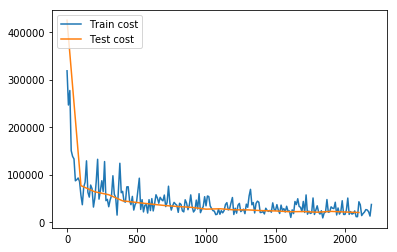

<Figure size 432x288 with 0 Axes>

In [42]:

#用于画图展示训练cost
from paddle.utils.plot import Ploter
train_prompt = "Train cost"
test_prompt = "Test cost"
plot_prompt = Ploter(train_prompt, test_prompt)
step = 0

# 训练主循环
feeder = fluid.DataFeeder(place=place, feed_list=[x, y])
exe.run(startup_program)

exe_test = fluid.Executor(place)

#num_epochs=100表示迭代训练100次后停止训练。
num_epochs = 100

for pass_id in range(num_epochs):
    for data_train in train_reader():
        avg_loss_value, = exe.run(main_program,
                                  feed=feeder.feed(data_train),
                                  fetch_list=[avg_loss])
        if step % 10 == 0:  # 每10个批次记录并输出一下训练损失
            plot_prompt.append(train_prompt, step, avg_loss_value[0])
            plot_prompt.plot()
            #print("%s, Step %d, Cost %f" %(train_prompt, step, avg_loss_value[0]))
        if step % 100 == 0:  # 每100批次记录并输出一下测试损失
            test_metics = train_test(executor=exe_test,
                                     program=test_program,
                                     reader=test_reader,
                                     fetch_list=[avg_loss.name],
                                     feeder=feeder)
            plot_prompt.append(test_prompt, step, test_metics[0])
            plot_prompt.plot()
            #print("%s, Step %d, Cost %f" %(test_prompt, step, test_metics[0]))
            
            if test_metics[0] < 10.0: # 如果准确率达到要求，则停止训练
                break

        step += 1

        if math.isnan(float(avg_loss_value[0])):
            sys.exit("got NaN loss, training failed.")

        #保存训练参数到之前给定的路径中
        if params_dirname is not None:
            fluid.io.save_inference_model(params_dirname, ['x'], [y_predict], exe)

得到的cost函数变化图像大致应是一个收敛的结果：
<img src='images/result.png' style = "width:400px;height:300px;">

# 4 - 预测


预测器会从params_dirname中读取已经训练好的模型，来对从未遇见过的数据进行预测。  
通过fluid.io.load_inference_model，预测器会从params_dirname中读取已经训练好的模型，来对从未遇见过的数据进行预测。

In [43]:
infer_exe = fluid.Executor(place)
inference_scope = fluid.core.Scope()

**预测**

预测器会从params_dirname中读取已经训练好的模型，来对从未遇见过的数据进行预测。

- tensor_x:生成batch_size个[0,1]区间的随机数，以 tensor 的格式储存
- results：预测对应 tensor_x 面积的房价结果
- raw_x:由于数据处理时我们做了归一化操作，为了更直观的判断预测是否准确，将数据进行反归一化，得到随机数对应的原始数据。

In [44]:
with fluid.scope_guard(inference_scope):
    [inference_program, feed_target_names, fetch_targets
     ] = fluid.io.load_inference_model(params_dirname, infer_exe) # 载入预训练模型


    batch_size = 2
    tensor_x = np.random.uniform(0, 1, [batch_size, 1]).astype("float32")
    
    print("tensor_x is :" ,tensor_x )
    results = infer_exe.run(
        inference_program,
        feed={feed_target_names[0]: tensor_x},
        fetch_list=fetch_targets) # 进行预测
    raw_x = tensor_x*(maximums[0]-minimums[0])+avgs[0]
    print("the area is:",raw_x)
    print("infer results: ", results[0])
    

tensor_x is : [[0.01975913]
 [0.1009222 ]]
the area is: [[ 97.80343]
 [110.77897]]
infer results:  [[629.6942 ]
 [708.95013]]


此处应得到一组预测结果：

('the area is:', array([[####],

       [####]], dtype=float32))
       
('infer results: ', array([[####],

       [####]], dtype=float32))


根据线性模型的原理，补全输出公式，计算a和b的值

- 提示：已知两点求直线方程


In [45]:

a = (results[0][0][0] - results[0][1][0]) / (raw_x[0][0]-raw_x[1][0])
b = (results[0][0][0] - a * raw_x[0][0])

print(a,b)

6.108102 32.300903


预测结果应为：a=6.7,b=-24.42(每次训练结果取随机数，因此得到的结果可能会有一点点偏差，但大致应在这个范围之间）,因此本次模型得到的房屋面积与房价之间的拟合函数为$y=6.7x-24.42$。其中y为预测的房屋价格，x为房屋面积，根据这个公式可以推断：如果有500万的预算，想在该地区购房，房屋面积大概为$\frac{500-(-24.42)}{6.7}=78(m^2)$。

**（5）绘制拟合图像 **

通过训练，本次线性回归模型输出了一条拟合的直线，想要直观的判断模型好坏可将拟合直线与数据的图像绘制出来。



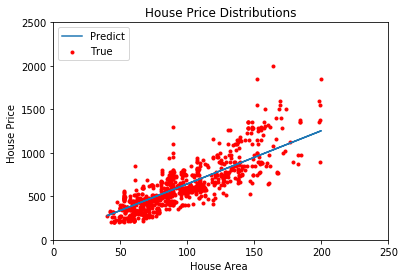

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data):
    x = data[:,0]
    y = data[:,1]
    y_predict = x*a + b
    plt.scatter(x,y,marker='.',c='r',label='True')
    plt.title('House Price Distributions')
    plt.xlabel('House Area ')
    plt.ylabel('House Price ')
    plt.xlim(0,250)
    plt.ylim(0,2500)
    predict = plt.plot(x,y_predict,label='Predict')
    plt.legend(loc='upper left')
    plt.savefig('result1.png')
    plt.show()

data = np.loadtxt('./datasets/data.txt',delimiter = ',')
plot_data(data)



从输出结果图可以看出，预测数据落在直线上，通过观察可以清楚地看到真实数据大部分散布在预测数据周围，说明预测结果是比较可靠的。

你得到的预测图，应与下图相似：<img src='images/plt.png' style = "width:400px;height:300px;">

# 5 - 总结

通过这个练习我们应该记住：

1. 机器学习的典型过程：
    
    - 获取数据
    
    - 数据预处理
    
    -训练模型
    
    -应用模型

2. fluid训练模型的基本步骤: 

    - 配置网络结构：
    
    - 定义成本函数avg_cost
    
    - 定义优化器optimizer
    
    - 获取训练数据
    
    - 定义运算场所(place)和执行器(exe)
    
    - 提供数据(feeder)

    - 执行训练(exe.run)

    - 预测infer()并输出拟合图像

3. 练习中的许多参数可以作调整，例如修改学习率会对模型结果产生很大影响，大家可以在本练习或者后面的练习中多做些尝试。


至此线性回归模型的训练工作完成，希望通过本次课程的学习，读者可以利用提供的代码完成一个简单的房价预测模型。通过这一过程，初步了解PaddlePaddle这一易学易用的分布式平台。

本节课作为PaddlePaddle的快速入门章节，希望可以开启您的下一步深度学习之门。